In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
import timeit

import warnings 

warnings.filterwarnings('ignore')

Importing the dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AIP-BITS/BITS-DATA/main/cancer.csv")

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
df['target'] = df['target'].map({0: 'M', 1: 'B'})

In [ ]:
df['target'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['target'].replace(['M', 'B'], [1, 0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Checking for NULL values in the dataset

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Checking for duplicates in the dataset

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Count Plot for the target from the dataset

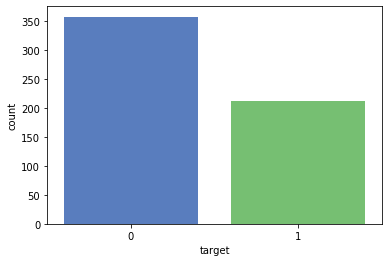

In [ ]:
sns.countplot(x='target',data=df)

Correlation Matrix generated for all the features in the dataset

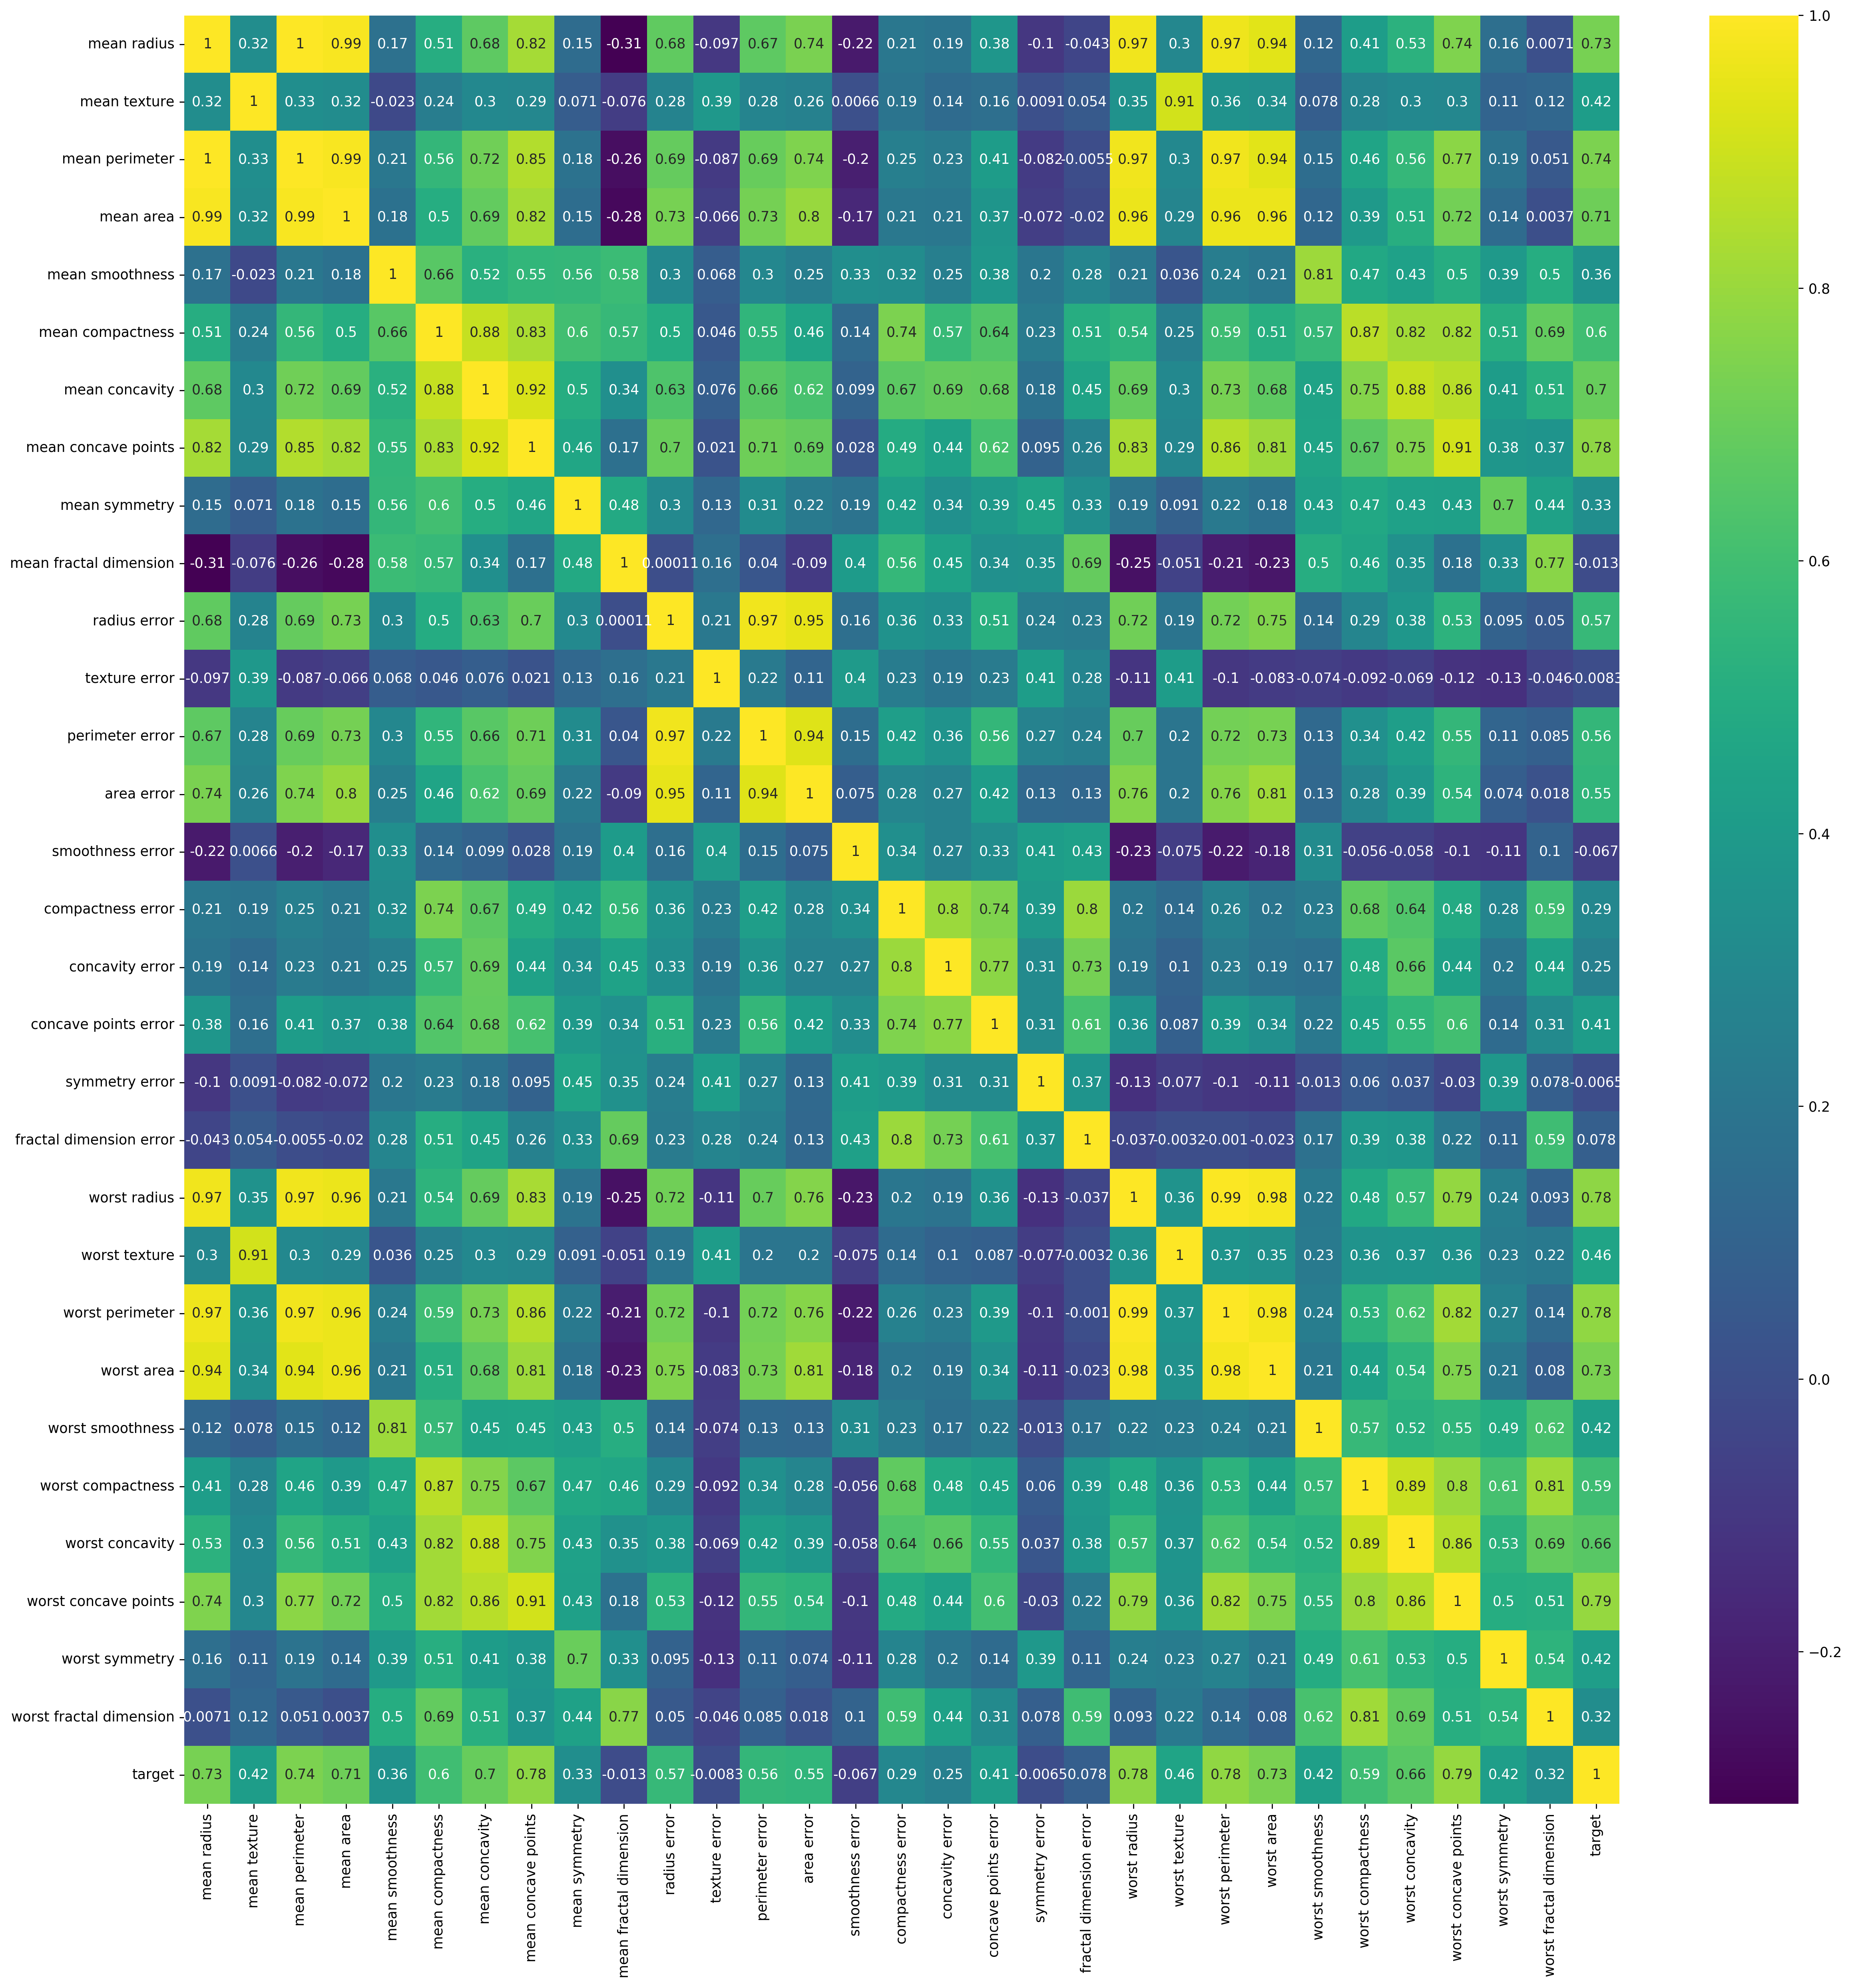

In [ ]:
#correlation matrix
plt.figure(figsize=(20,20),dpi=250,tight_layout=True)
sns.heatmap(df.corr(),annot=True,cmap="viridis")

'concave points_worst', 'perimeter_worst' and 'radius_worst' are strongly correlated with 'Target'

In [ ]:
cancerous = df.corr()['target'].sort_values(ascending=False).round(2)

Correlation Matrix summarised with values sorted in descending for target feature

In [ ]:
cancerous

target                     1.00
worst concave points       0.79
worst perimeter            0.78
mean concave points        0.78
worst radius               0.78
mean perimeter             0.74
worst area                 0.73
mean radius                0.73
mean area                  0.71
mean concavity             0.70
worst concavity            0.66
mean compactness           0.60
worst compactness          0.59
radius error               0.57
perimeter error            0.56
area error                 0.55
worst texture              0.46
worst smoothness           0.42
worst symmetry             0.42
mean texture               0.42
concave points error       0.41
mean smoothness            0.36
mean symmetry              0.33
worst fractal dimension    0.32
compactness error          0.29
concavity error            0.25
fractal dimension error    0.08
symmetry error            -0.01
texture error             -0.01
mean fractal dimension    -0.01
smoothness error          -0.07
Name: ta

Splitting dataset into X and y for building models

In [ ]:
X = df.drop('target',axis=1)
y = df['target'] 

Splitting dataset into Train and test where split ratio is 0.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logistic Regression as baseline classifier

In [ ]:
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

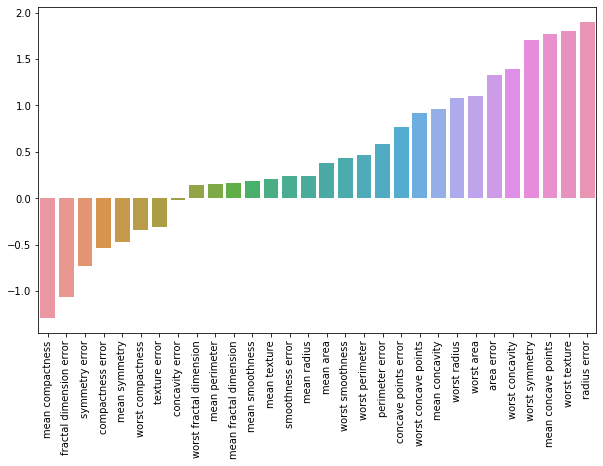

In [ ]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90);

Classification Report for Logistic Model

In [ ]:
y_pred = log_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



array([[106,   2],
       [  1,  62]])

Decision Tree

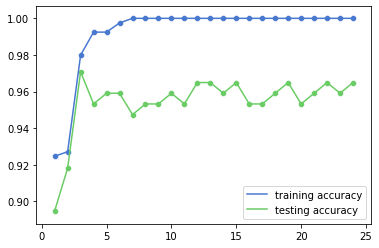

In [ ]:
depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
        
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [ ]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)

This is the best depth for Decision Tree Classifier:  3 
Accuracy score is:  0.9707602339181286


In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

log_model_cv = model_evaluation(log_model, 'recall')
tree_cv = model_evaluation(tree, 'recall')

for model in [log_model, tree]:
    model.fit(X_train, y_train)

score_cv = [log_model_cv.round(5), tree_cv.round(5)]
score_mean = [log_model_cv.mean(), tree_cv.mean()]
score_std = [log_model_cv.std(), tree_cv.std()]
score_recall_score = [recall_score(y_test, log_model.predict(X_test)), 
            recall_score(y_test, tree.predict(X_test))]
method_name = [ 'Logistic Classifier', 'Decision Tree Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,cv score,mean score,std score,recall score
0,Logistic Classifier,"[0.96667, 0.86667, 1.0, 0.93103, 0.9]",0.932874,0.047149,0.968254
1,Decision Tree Classifier,"[1.0, 0.9, 0.9, 0.86207, 0.93333]",0.919080,0.046324,0.920635


Grid Search for Hyper Parameter Tuning Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 42)

hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [3, 9, 13, 15, 17],
    'class_weight': ['list', 'dict', 'balanced'],
    'random_state': [42]
}

grid = GridSearchCV(
                tree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid.fit(X_train, y_train)

print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9528735632183907
best param {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'random_state': 42, 'splitter': 'random'}


Hyper Parameter Tuned Decision Tree

In [ ]:
tree_hyper = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3, min_samples_leaf=3, random_state=42,  class_weight='balanced')

Decision Tree Comparison before and after Hyper parameter Tuning


In [ ]:
tree.fit(X_train, y_train)
tree_recall = (recall_score(y_test, tree.predict(X_test)))

grid.best_estimator_.fit(X_train, y_train)
grid_recall = (recall_score(y_test, grid.predict(X_test)))

score_list = [tree_recall, grid_recall]
method_name = ['Decision Tree Classifier Before Tuning', 'Decision Tree Classifier After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Decision Tree Classifier Before Tuning,0.936508
1,Decision Tree Classifier After Tuning,0.984127


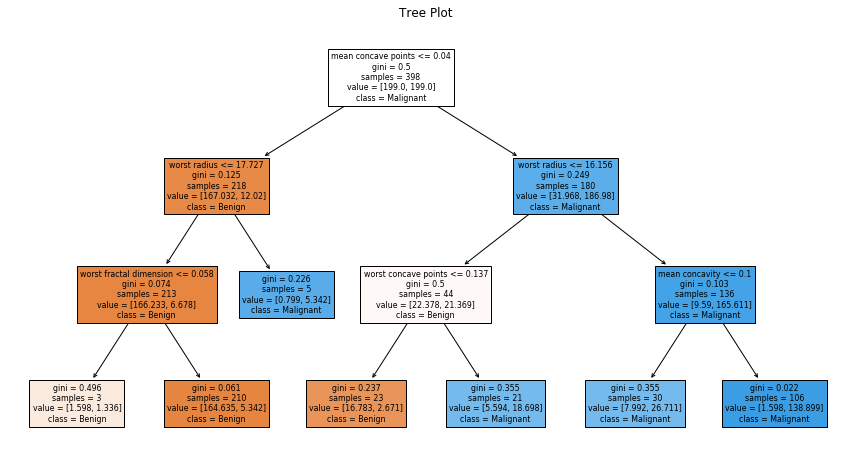

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(grid.best_estimator_, feature_names = list(X), class_names = ['Benign','Malignant'], filled = True)
plt.title('Tree Plot')
plt.show()

Only 5 features important

In [ ]:
importance_table = pd.DataFrame({
    'imp': grid.best_estimator_.feature_importances_
}, index = X.columns)
importance_table.sort_values('imp', ascending = False)

,imp
mean concave points,0.776297
worst radius,0.145138
worst concave points,0.054995
mean concavity,0.016977
worst fractal dimension,0.006593
concavity error,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000


Principal Component Analysis (PCA)

Projecting 30-dimensional data to 2D


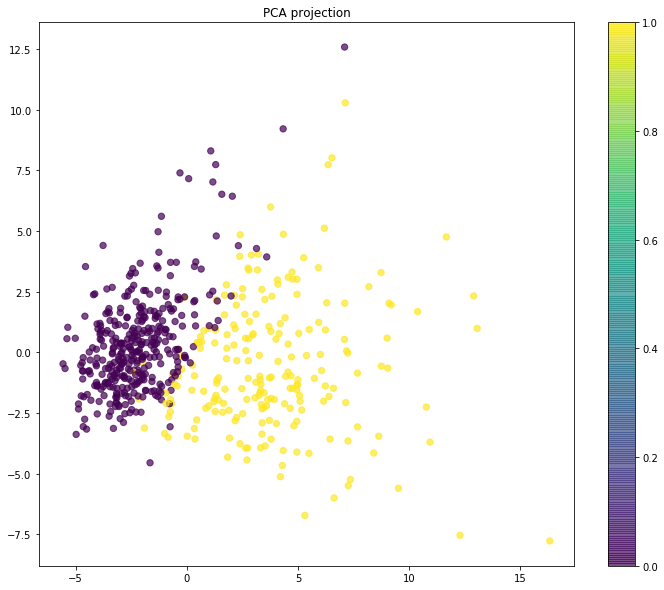

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['target'], alpha=0.7, s=40);
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

TSNE Method

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.418800
[t-SNE] KL divergence after 1250 iterations: 0.926562


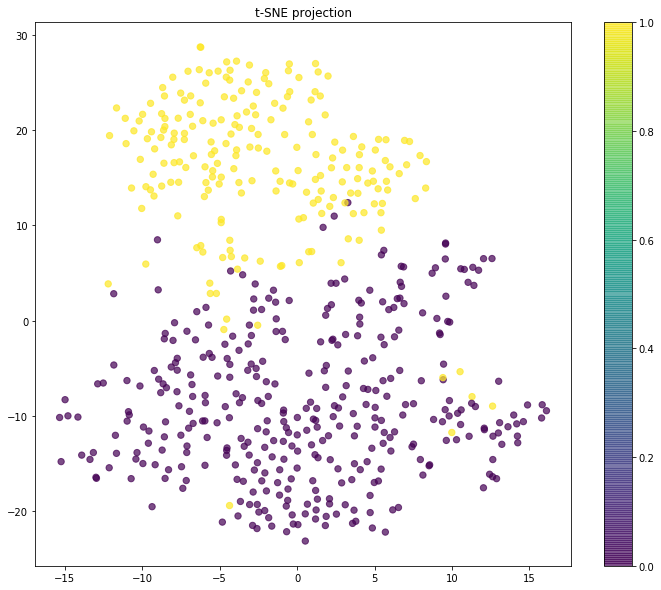

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 42)

df_tsne_scaled = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=df['target'], 
            alpha=0.7, s=40)
plt.colorbar()
plt.title('t-SNE projection');

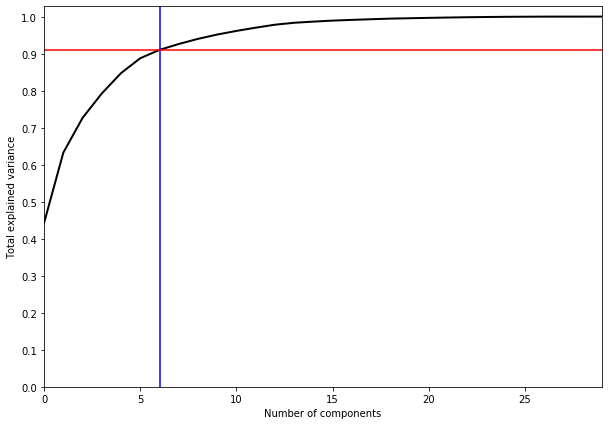

In [ ]:
pca = PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

In [ ]:
perimeters = [x for x in df.columns if 'perimeter' in x]
areas = [x for x in df.columns if 'area' in x]
df.drop(perimeters, axis = 1 ,inplace = True)
df.drop(areas, axis = 1 ,inplace = True)
worst = [col for col in df.columns if col.endswith('_worst')]
df.drop(worst, axis = 1 ,inplace = True)

Naive Bayes with multiple different Models

In [ ]:
nb = GaussianNB()
mb = MultinomialNB()
cb = ComplementNB()
nb.fit(X_train, y_train)
mb.fit(X_train, y_train)
cb.fit(X_train, y_train)

ComplementNB()

In [ ]:
print("Gaussian Naive Bayes score: ",nb.score(X_test, y_test))
print("Multinomial Naive Bayes score: ",mb.score(X_test, y_test))
print("Complement Naive Bayes score: ",cb.score(X_test, y_test))

Gaussian Naive Bayes score:  0.9415204678362573
Multinomial Naive Bayes score:  0.9122807017543859
Complement Naive Bayes score:  0.9122807017543859


Gaussian Naive Bayes performs the best without hyper parameter tuning

Hyper Parameter Tuning for all the Naive Bayes Models

In [ ]:
param_grid = {'var_smoothing': [1e-12,1e-11,1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search = GridSearchCV(nb, param_grid,cv =5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nGaussianNB")
print(grid_search.best_params_)
print(grid_search.best_score_)

param_grid = {'alpha': [1e-12,1e-11,1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search = GridSearchCV(mb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nMultinomialNB")
print(grid_search.best_params_)
print(grid_search.best_score_)

grid_search = GridSearchCV(cb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nComplementNB")
print(grid_search.best_params_)
print(grid_search.best_score_)


GaussianNB
{'var_smoothing': 1e-09}
0.9371835443037975

MultinomialNB
{'alpha': 1e-12}
0.8893987341772153

ComplementNB
{'alpha': 1e-12}
0.8868987341772152


Hyper Parameter Tuned Naive Bayes Models

In [ ]:
nb_hyper = GaussianNB(var_smoothing=1e-09)
mb_hyper = MultinomialNB(alpha= 1e-12)
cb_hyper = ComplementNB(alpha= 1e-12)

Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



Hyper Parameter Tuning for SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
report = classification_report(y_test, y_pred)

results = pd.DataFrame(grid.cv_results_)

print(results.to_string())

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_gamma param_kernel                                          params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0        0.010582      0.001670         0.004155        0.000160     0.1           1          rbf         {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}             0.6250             0.6250             0.6250           0.632911           0.620253         0.625633        0.004077               22
1        0.222789      0.183393         0.002606        0.000485     0.1           1       linear      {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}             0.9500             0.9375             0.9750           0.949367           0.911392         0.944652        0.020636               13
2        0.009915      0.000200         0.003952        0.000139     0.1         0.1          rbf       {'C': 0.1, 'gamma': 0.1

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.9647784810126583


Result Comparison for different Models (second appearance for the same classifier name is the hyper parameter tuned version of the original)

In [ ]:
classifiers = [
    log_model,
    tree,
    nb,
    mb,
    cb,
    svm,
    tree_hyper,
    nb_hyper,
    mb_hyper,
    cb_hyper,
    SVC(C= 10, gamma= 1, kernel= 'linear')
]

results = []
for clf in classifiers:
    clf.fit(X, y)
    y_pred = clf.predict(X)
    time = timeit.timeit(lambda: clf.predict(X[0:1]), number=1000)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    results.append([clf.__class__.__name__, precision, recall, f1, time])

results = np.asarray(results)
print("       Classifier      | Precision | Recall | F1 Score | Prediction Time (ms)")
print("-----------------------|-----------|--------|----------|---------------------")
for result in results:
    print("{:22s} | {:.6s}    | {:.6s}    | {:.6s} |        {:3s}".format(*result))

       Classifier      | Precision | Recall | F1 Score | Prediction Time (ms)
-----------------------|-----------|--------|----------|---------------------
LogisticRegressionCV   | 0.9711    | 0.9528    | 0.9619 |        1.318167772000379
DecisionTreeClassifier | 0.9807    | 0.9622    | 0.9714 |        1.2914822940001613
GaussianNB             | 0.9497    | 0.8915    | 0.9197 |        1.4174391960004868
MultinomialNB          | 0.9421    | 0.7688    | 0.8467 |        1.2917721810008516
ComplementNB           | 0.9367    | 0.7688    | 0.8445 |        1.2954809149996436
SVC                    | 0.9666    | 0.8207    | 0.8877 |        1.2782459869995364
DecisionTreeClassifier | 0.9299    | 0.9386    | 0.9342 |        1.2366036029998213
GaussianNB             | 0.9497    | 0.8915    | 0.9197 |        1.323773739999524
MultinomialNB          | 0.9421    | 0.7688    | 0.8467 |        1.289363570000205
ComplementNB           | 0.9367    | 0.7688    | 0.8445 |        1.304077597000287
SVC     

Retraining model with best Accuracy, recall and F1-Score

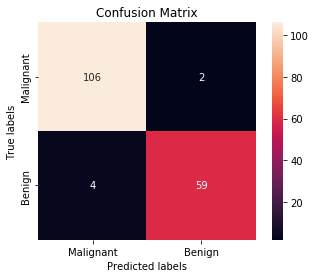

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malignant', 'Benign']);
ax.yaxis.set_ticklabels(['Malignant','Benign']);
plt.show()